_LEARNING-CIRCLE-24 PROJECT_

<h2> Learning-Circle-24 </h2> <p>  Contributors </p>



# **Crime in Chicago**
This is a dataset
The data dictionary can be found in [Chicago Crime Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data)

In this notebook, we are going to explore more about crime in Chicago and try to answer few questions.

Analyzing the Chicago crime dataset involves examining various aspects of the data to understand patterns, trends, and characteristics of criminal activities in Chicago. We perform analysis using Python, pandas and visualization libraries using the following steps:

1. Load the Dataset: Load the Chicago crime dataset into a DataFrame.
2. Explore the Dataset: Examine the structure, columns, and basic statistics of the dataset.
3. Data Preprocessing: We cleaned the data by dropping redundant columns,handling missing values and converting columns to their appropriate format.
4. Feature Engineering: Create new column for Months, Day, Season
5. EDA: Exploratory Data Analysis
    - What is the total number of crime cases filed from 2001 till date?
    - How many unique crimes are available and what is the count for each crime from 2001-2022?
    - what is the number of crime per year?
    - What is the number of crime per month?
    - Top 10 number of cases discovered each day?
    - What is the trend of crime by type?
    - Where does crimes happen the most?
    - What is the number of crime discovered by month and year?
    - Are there specific location that crimes used to happen?
    - What is the arrested rate per crime?
    - Top 10 Block with the most crime?
    - Top 10 ward with most amount of crimes?
    - Top 10 community area with the most amount of crimes?
    - Top 10 communities with the most crime in 2023?
    - Top 10 Location where theft normally occurs?
    - Top-15 crime where arrest occured?
    - How has crime in Chicago changed across years? Was 2021 really the bloodiest year in two decades?
    - Are some types of crimes more likely to happen in specific locations or specific time of the day or specific day of the week than other types of        crimes?
    - In which month did the lowest motor vehicle thefts occur?
    - How prominant are certain types of various crimes?
    - How do rates of crime change of time? For instance, are there any seasonal effects or changes depending on the time ofday?
    - Where do these crimes occur? Are some areas more safe than others?
6. Summarize and Visualize Insights: Summarize and Visualize the key insights and findings from the analysis using plots and charts.

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [ ]:
# Set display option
pd.set_option('display.max.columns', None)

In [ ]:
!jupyter --version

# 1. Loading the dataset

This dataset was extracted in 2023 and contains crime cases from 2001 to 2023, but we want the data for only cases from 2001 to 2022 due to incomplete cases for 2023 in order to avoid a bias analysis.

In [13]:
full_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/c_crime_df_chicago.csv')
# Drop rows that have 2024 as the year.
chicago_crime_df = pd.DataFrame(full_dataset[full_dataset['Year'] != 2023])
chicago_crime_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


# 2. Explore the dataset

In [ ]:
#checking the dimension of the dataset
chicago_crime_df.shape

In [ ]:
# Display the first five rows of the dataset
chicago_crime_df.columns

In [ ]:
# check the first five observations
chicago_crime_df.head()

In [ ]:
 # Display column information and data types
chicago_crime_df.info()

In [ ]:
# checking missing value count
chicago_crime_df.isnull().sum()

In [ ]:
chicago_crime_df.describe()

# 3. Data Preprocessing

**Data Cleaning**

Here are some steps that we would carry out in this phase

1. Remove redundant or unnecessary columns
2. Handle missing values
3. Convert data types to the appropriate formats  

__Reasons for dropping the below columns__
- 'Unnamed: 0': Its just an index for individual row/ Observation
- 'ID': Serial identifier for the record which is redundant due to the presence of a case number for each case.
- 'Location': This is where the incident occurred in a format that allows for creation of maps and other geographic operation. It's the combination of both latitude and longitude feature of this dataset thus, not required.
- 'Updated On': Holds the date and time the record was last updated.Which is not required for our analysis.
- 'X Coordinate': The x coordinate is a shifted location from the actual location for partial redaction but falls on the same block. Since we have a longitude/latitude and the block where the crime happened, we can neglect this feature.
- 'Y Coordinate': The y coordinate is a shifted location from the actual location for partial redaction but falls on the same block. Since we have a longitude/latitude and the block where the crime happened, we can neglect this feature.
- 'Community Area': This indicates the community area where the incident occurred. Which is not neccessary for our analysis.
- 'IUCR': This is the Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description, it provides information about the primary type and description of crime. Since primary type and description features already exist, it becomes a redundant column
- Description: It's simply a subcategory of the primary type(which describes the type of crime committed). this can be omitted
- Block: Since we have the latitude and longitude, this column is redundant.
- Community Area: This is not needed in our analysis and the presence of a police Beat makes this redundant.
- FBI Code: Removed because it is not necessary for our analysis as we are unable to de-code these codes.

__1. Use a funtion to Drop redundant columns and/or columns that are not necessary for our analysis (a redundant column is one that gives infomation that another column already explains: eg ID and Case number)__

In [ ]:
chicago_crime_df.columns

In [ ]:
# Dropping redundant columns
def drop_redundant_columns(df):
    redundant_columns = ['Unnamed: 0','ID', 'Location','Updated On', 'FBI Code', 'Description', 'X Coordinate','Y Coordinate','IUCR']
    df.drop(redundant_columns, axis=1, inplace= True)

drop_redundant_columns(chicago_crime_df)

In [ ]:
chicago_crime_df.head()

In [ ]:
chicago_crime_df.info()

In [ ]:
# A summary statistics of each column
chicago_crime_df.describe(include='all')

In [ ]:
chicago_crime_df.info()

__3. Handling missing values__

In [ ]:
# checking missing value count
chicago_crime_df.isnull().sum()

In [ ]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(chicago_crime_df)

- __Handling Missing Case Number__

We have one (1) missing Case Number in the entire dataset. We have decided to drop the row where Case Number is missing

In [ ]:
# dropping the missing Case Number column null value
chicago_crime_df.dropna(subset=['Case Number'],inplace=True) # i chose to drop this because the percentage NA is insignificant

In [ ]:
chicago_crime_df.isna().sum()

- __Handling Missing values for the District Column__

We have just 12 missing value for the district column which is 0.0% of the entire dataset. We have decided to drop the row where location discription is missing.

In [ ]:
# dropping the missing district column null value
chicago_crime_df.dropna(subset=['District'],inplace=True) # i chose to drop this because the percentage NA is insignificant

In [ ]:
chicago_crime_df.District.unique()

In [ ]:
chicago_crime_df.isna().sum()

- __Handling Missing values for the ward Column (Using data imputation)__

In [ ]:
missing_values_table(chicago_crime_df)

In [ ]:
# checking the unique values of the ward column
chicago_crime_df.Ward.unique()

In [ ]:
chicago_crime_df.Ward

In [ ]:
# Using ffill(forward fill) to fill missing value in the ward column
chicago_crime_df.Ward = chicago_crime_df.Ward.ffill() # Last observed value is carried forward

In [ ]:
chicago_crime_df.isna().sum()

- __Handling Missing values for the Community Area Column (Using data imputation)__

In [ ]:
missing_values_table(chicago_crime_df)

In [ ]:
# checking the unique values of the ward column
chicago_crime_df['Community Area'].unique()

In [ ]:
# Using ffill(forward fill) to fill missing value in the Community Area column
chicago_crime_df['Community Area'] = chicago_crime_df['Community Area'].ffill() # Last observed value is carried forward

In [ ]:
chicago_crime_df.isna().sum()

- __Handling Missing values for the latitude and Longitude Column__ (Using Assosciation) <br>
    - The assumption here is that the latitude and longitude readings are points that show exact location, are closer to eachother within a district. if they are, we can group our data by districts and fill up missing Latitide and longitude values by the median or mode.

In [ ]:
chicago_crime_df.groupby(['District', 'Longitude', 'Latitude']).size()

There appears to be closeness in longitude and Latitude points when data is grouped based on districts, we can group based on district and fill up by taking the median.

In [ ]:
chicago_crime_df['Latitude'] = chicago_crime_df.groupby('District')['Latitude'].transform(lambda x: x.fillna(x.median()))
chicago_crime_df['Longitude'] = chicago_crime_df.groupby('District')['Longitude'].transform(lambda x: x.fillna(x.median()))

In [ ]:
chicago_crime_df.isna().sum()

- __Handling Missing values for the Location Description__

We have just 2877 missing value for the location description which is 0.1% of the entire dataset. We can decide to drop the row where location decription is missing or fill this row with the most crime location.

In [ ]:
chicago_crime_df.groupby(['District','Location Description']).size()

In [ ]:
# dropping the missing location description index row
chicago_crime_df.dropna(subset=['Location Description'],inplace=True)

In [ ]:
chicago_crime_df.isna().sum()

__3. convert inappropriate data types to the correct one__

We should convert the columns to appropriate datatypes for
1. Alignment with original dataset types.
2. For performance gains (clearly, using a numpy.float64 when a numpy.int64 is required will lower our memory footprint).

In [14]:
# create a copy of the dataframe to avoid conflict
c_crime_df = chicago_crime_df.copy()

In [16]:
# Including the date format dramatically increases performance.
c_crime_df["Date"] = pd.to_datetime(c_crime_df["Date"], format = "%m/%d/%Y %I:%M:%S %p", utc = True)
c_crime_df["Beat"] = c_crime_df["Beat"].astype(np.int64)
c_crime_df["Ward"] = c_crime_df["Ward"].astype(np.int64)
c_crime_df["District"] = c_crime_df["District"].astype(np.int64)
c_crime_df["Community Area"] = c_crime_df["Community Area"].astype(np.int64)
c_crime_df['Block'] = c_crime_df['Block'].astype(str)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

# 4. Feature Engineering

Create new columns for Time, Date, Block_new, Street, Months, Day, and Season

In [17]:
# Create new columns for Months
def extract_and_map_month(date):
    # ensure the input is in datetime format
    # 07/26/2008 02:30:00 PM
    date_column = pd.to_datetime(date, format='%m/%d/%Y %I:%M:%S %p')

    month_names = date_column.dt.month_name()
# dt is an attribute of the date column object
# month_name() is a method
    return month_names

In [18]:

c_crime_df['Month'] = extract_and_map_month(c_crime_df['Date'])

# Group by month and count number of crimes
monthly_crime_counts = c_crime_df.groupby('Month').size()

In [ ]:
# Create new columns for Day
def extract_and_map_month(date):
    # ensure the input is in datetime format
    # 07/26/2008 02:30:00 PM
    date_column = pd.to_datetime(date, format='%m/%d/%Y %I:%M:%S %p')

    day_names = date_column.dt.day_name()
# dt is an attribute of the date column object
# month_name() is a method
    return day_names

In [ ]:
c_crime_df['Day'] = extract_and_map_month(c_crime_df['Date'])

# Group by day and count number of crimes
daily_crime_counts = c_crime_df.groupby('Day').size()

In [ ]:
# Function to define various month and their corresponding season
def get_season(month):
    if month in ['December','January','February']:
        return 'Winter'
    elif month in ['March','April','May']:
        return 'Spring'
    elif month in ['June','July','August']:
        return 'Summer'
    else:
        return 'Fall'

In [ ]:
c_crime_df['Season'] = c_crime_df['Month'].apply(get_season)

# Group by season and count number of crimes
seasonal_crime_counts = c_crime_df.groupby('Season').size()


In [ ]:
c_crime_df.head()

# 4. EDA: Data Exploration

## Non - Graphical

1. **Total Number of Crime cases Filed**

In [ ]:
# Number of Unique Case Number.

print(f"Out of {len(c_crime_df)}: {len(c_crime_df['Case Number'].unique())} are unique case numbers")

**Observation**: Most case numbers are unique case numbers.

Number of Non-Unique cases

In [ ]:
# Out of all cases , how many are non_unique cases ?

non_unique_case_number = c_crime_df[c_crime_df.duplicated('Case Number') | c_crime_df.duplicated('Case Number', keep=False)]['Case Number'].tolist()

print(f"Length of non_unique: {len(non_unique_case_number)} out of {len(c_crime_df)}")

In [ ]:
non_unique_case_number_df = c_crime_df[c_crime_df.duplicated('Case Number', keep=False)]
non_unique_case_number_df.head() # Saving non_unique case number dataframe for future use.

**Observation**: There are 2275789 unique values of case number out of 2275836 , it means there are 2275789 cases registered with a single crime the rest 92 are the case numbers which have commited multiple crimes.

2. **Out of total case registered how many are arrested and how many are not?**

In [ ]:
# Out of total case registered how many are arrested and how many are not?


arrested = c_crime_df['Arrest'].where(c_crime_df['Arrest'] == True).count()
not_arrested = c_crime_df['Arrest'].where(c_crime_df['Arrest'] != True).count()

print(f"Out of {len(c_crime_df)},\n{arrested} are Arrested and \n{not_arrested} are not Arrested.")

**Observation**: Out of total crime cases received, 27% of the Criminals are arrested, 73% were not.

3. **How many unique crimes are available and what is the count for each crime from 2001-2022?**

In [ ]:
# Group by Crime type and calculate count
crime_count = c_crime_df['Primary Type'].unique()
print(f'The Number of unique crimes are {len(crime_count)} and the count for each crime are:')
count_for_each_crime = pd.DataFrame(c_crime_df.groupby('Primary Type').size().sort_values(ascending=False).rename('Count').reset_index())
count_for_each_crime.head()

4. **Number of crimes per Year**

In [ ]:
# Count the number of crimes per year
crime_counts_per_year = c_crime_df['Year'].value_counts().sort_index().rename('Count').reset_index()
print(f'The amount of crimes per year are as follow: ')
crime_counts_per_year

5. **Number of crimes by month**

how many records we have for each month ?

In [ ]:
# Count the number of crimes per Month
crime_counts_per_month = c_crime_df['Month'].value_counts().sort_index().rename('Count').reset_index()
print(f'The amount of crimes per month are as follow: ')
crime_counts_per_month

6. **Number of crimes by seasons**

how many records we have for each seasons ?

In [ ]:
# Count the number of crimes per Seasons
crime_counts_per_season = c_crime_df['Season'].value_counts().sort_index().rename('Count').reset_index()
print(f'The Seasonal Crime rate are as follow: ')
crime_counts_per_season

7. **Number of crimes by day**

how many records we have for each day ?

In [ ]:
# Count the number of crimes per day
crime_counts_per_day = c_crime_df['Day'].value_counts().sort_index().rename('Count').reset_index()
print(f'The daily Crime rate are as follow: ')
crime_counts_per_day

In [ ]:
# What are the top 5 most common crime types?
common_crime = c_crime_df['Primary Type'].value_counts().head()
print(f'The top 5 most common crime types are {common_crime}')

In [ ]:
# what is the most common location description for crimes?

print("Most common location description for crimes:",c_crime_df['Location Description'].mode()[0])

In [ ]:
# what are the top 10 most common crimes in 2021?
crime_2021 = c_crime_df[c_crime_df['Year'] == 2021]
print("Top 10 most crime in 2021: ")
crime_2021['Primary Type'].value_counts().head(10)

In [ ]:
# How many crimes were reported each month in 2021 ?
monthly_crime_2021 = crime_2021['Month'].value_counts().sort_index()
print('Number of crimes reported each month in 2021:')
monthly_crime_2021

In [ ]:
How many crimes

8. **Top 10 - Number of cases each day**

In [ ]:
# Top 10 - Number of cases each day?

top_10_num_of_cases_each_day = c_crime_df.groupby(['Date'])['Case Number'].count().reset_index(name = 'no_of_cases').set_index('no_of_cases').sort_index(ascending = False)[:10]
top_10_num_of_cases_each_day

## Graphical

In [ ]:
crime_counts_per_year = c_crime_df['Year'].value_counts().sort_index()
# Plotting
plt.figure(figsize=(20, 13))
crime_counts_per_year.plot(kind='bar',fontsize = 15)
plt.title('Trend of Crimes in Chicago from 2001 to 2022', fontsize = 30)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Number of Crimes',fontsize = 20)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observations:**

1. The crime rate is dropping overall.
2. In 2001,number of crime incidents were close to 150k.
3. In 2022 ,it's estimate to be 36k , so it's a major drop in crime.
4. By 2023 we expect a major drop down to an estimate of 10k

5. **Number of crimes by month**

how many records we have for each month ?





In [ ]:
monthly_crime_counts = c_crime_df.groupby('Month').size()

# Set index and sort
monthly_crime_counts = monthly_crime_counts.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], axis=0)

# Plotting
monthly_crime_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Seasonal Crime Trend')
plt.grid(True)
plt.show()

In [ ]:
crime_counts_per_month = c_crime_df['Month'].value_counts().sort_index()
# Plotting
plt.figure(figsize=(20, 13))
crime_counts_per_month.plot(kind='bar',fontsize = 20)
plt.title('Monthly Trend of Crimes in Chicago', fontsize = 30)
plt.xlabel('Months',fontsize = 20)
plt.ylabel('Number of Crimes',fontsize = 20)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:

# monthly_crime_count = c_crime_df.resample("M"  , on = 'Date').size()

# # Create a line plot.

# plt.figure(figsize = (10,6))
# plt.plot(monthly_crime_count.index , monthly_crime_count.values , marker = 'o')
# plt.xlabel("Date")
# plt.ylabel("Number of crime incidents")
# plt.title("Monthly Crime Trends in Chicago")
# plt.xticks(rotation = 45)
# plt.tight_layout()
# plt.show()


This chart clearly shows a "periodic" pattern in the crimes over many years, which shows why crimes are very predictable activity.

**Observations:**
- From the figure above, its observed that FEBRUARY recorded the least amount of crime cases and JULY is the month where crimes are comitted the most.

6. **Number of crimes by Season**

how many records we have for each season ?

In [ ]:

crime_counts_per_season = c_crime_df['Season'].value_counts()
# Plotting
plt.figure(figsize=(20, 13))
crime_counts_per_season.plot(kind='bar',fontsize = 25)
plt.title('Seasonal Trend of Crimes in Chicago', fontsize = 30)
plt.xlabel('Season',fontsize = 20)
plt.ylabel('Number of Crimes',fontsize = 20)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
crime_counts_per_day = c_crime_df['Day'].value_counts()
# Plotting
plt.figure(figsize=(20, 13))
crime_counts_per_day.plot(kind='bar',fontsize = 25)
plt.title('Daily Trend of Crimes in Chicago', fontsize = 30)
plt.xlabel('Day',fontsize = 20)
plt.ylabel('Number of Crimes',fontsize = 20)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Top 10 - Number of cases each day
top_10_num_of_cases_each_day_df = pd.DataFrame(top_10_num_of_cases_each_day)
index_df = top_10_num_of_cases_each_day_df.index

sns.barplot(x = index_df , y = 'Date' , data = top_10_num_of_cases_each_day_df)
plt.title("Top 10 - Number of cases each day - Bar plot")
plt.xlabel("Number of Cases")
plt.ylabel("Date")
plt.show()

**Observation**: The average Number of cases per day could be less than 60


7. __Number of crime by type__</br>
We try to indentify the trend and highpoints or lowpoints.

In [ ]:
# Function to plot the serie value_counts
def plot_counts(serie, title):
    df = pd.DataFrame(serie.value_counts()[:10])
    df.columns = ["Freq"]
    df["Type"] = df.index
    fig = px.bar(df, y="Freq", x="Type", text="Freq", color="Freq", color_continuous_scale=px.colors.sequential.Blugrn)
    fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode="hide")
    fig.update_layout(title_text=title)
    fig.show()


plot_counts(c_crime_df["Primary Type"], "Type of Crimes")

Observation: THEFT, BATTERY, CRIMINAL DAMAGE and NARCOTICS represents more the 65% of the crimes.

8. __Where does crimes happens the most?__

In [ ]:
plot_counts(c_crime_df["Location Description"], "Location of Crimes")

**Observation**: Crime happens mostly on the street

9. __Number of crimes per Year x Months__ </br>
Let's see the number of crimes per Year and Months...

In [ ]:
# first we convert the date column to datetime data type.

c_crime_df['Date'] = pd.to_datetime(chicago_crime_df['Date'],format = "%m/%d/%Y %I:%M:%S %p")
c_crime_df.set_index("Date", inplace=True)

In [ ]:
cases = pd.DataFrame(c_crime_df.resample("M").size(), columns=["Number of cases"])
cases["Month"] = cases.index.month.astype(str)
cases["Year"] = cases.index.year.astype(str)
cases["Year-Month"] = cases["Year"].str.cat(cases["Month"].str.zfill(2), sep="-")
cases.head()

BY HEATMAP

In [ ]:
case_table = cases[["Month", "Year", "Number of cases"]]
case_table  = case_table.pivot(index='Month', columns='Year', values='Number of cases').fillna(0).astype(int)
case_table.index = case_table.index.astype(int)
case_table = case_table.sort_index()
case_table.index = ['Jan', 'Fev', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(20, 10))
_ = sns.heatmap(
    case_table,
    annot=True,
    fmt="d",
    linewidths=0.5,
    cmap="Blues",
).set_title('Number of crimes in chicago per Year x Months')

The years between 2001 and 2012 were a tough time, the year 2008 was the worst with a mean of 71004 crimes per month, and the best year was the 2015 with a mean of 21916 crimes per month.

BY BAR

In [ ]:
fig = px.bar(
    cases,
    x="Year-Month",
    y="Number of cases",
    hover_data=["Year", "Month", "Number of cases"],
    color="Number of cases",
    height=600,
    width=1400,
    color_continuous_scale=px.colors.sequential.Blugrn

)
fig.update_layout(title_text='Crime counts per year-month in bars')
fig.show()

Similar graph but using bars to visualize though noisy but can be used. Again the 'tough time' during 2001 until 2012.

10. **Are there specific location that crimes used to happen?**

Using Map plot

In [ ]:
map_marks = chicago_crime_df[['Latitude', 'Longitude']]
map_marks['Year'] =  pd.to_datetime(chicago_crime_df.Date, format="%m/%d/%Y %I:%M:%S %p").dt.year
map_marks.head()

In [ ]:
fig = px.scatter_mapbox(map_marks[map_marks.Year == 2016].sample(5000), lat="Latitude", lon="Longitude",
                        color_discrete_sequence=["fuchsia"], zoom=9, height=650)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Look like there is crime everywhere in Chicago, in the centre, you can see more points but also is a crowded place.

11. **What is the arrested rate per crime?**

In [ ]:
cases = c_crime_df.groupby('Primary Type')['Arrest'].mean().reset_index()
cases['Arrest (%)'] = cases['Arrest'].round(4)*100
cases.sort_values('Arrest', inplace=True)
fig = px.bar(
    cases,
    orientation='h',
    x="Arrest (%)",
    y="Primary Type",
    color="Arrest (%)",
    text="Arrest (%)",
    height=800,
    #width=800,
        color_continuous_scale=px.colors.sequential.Blugrn

)
fig.update_traces(texttemplate="%{text:.4s}", textposition="outside")
fig.update_layout(title_text="Arrested Rate in % per Type Crime in Chicago.")

fig.show()

The “VIOLATION” crimes look strongly correlated to the arrested rate once the 'cop' must be present in the location to declare the violation.

12. **Top 10 Block with the most crime**

In [ ]:
# Group the data by 'Block' and count occurrences
block_counts = chicago_crime_df['Block'].value_counts()

# Select the top 10 blocks with the most crimes
top_10_blocks = block_counts.head(10)

# Plot the top 10 blocks
top_10_blocks.plot(kind='bar', figsize = (20,13), fontsize = 15)
plt.title('Top 10 Blocks with Most Crime in Chicago',fontsize=30)
plt.xlabel('Block', fontsize=20)
plt.ylabel('Number of Crimes',fontsize=20)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

13. **Top - 10 Ward with most amount of crimes**

In [ ]:
# Group by 'Ward' and count the occurrences of crimes in each ward
ward_crime_counts = chicago_crime_df['Ward'].value_counts()

# Select the top 10 wards
top_10_wards = ward_crime_counts.head(10)

# Plot the data
top_10_wards.plot(kind='bar', figsize = (20,13), fontsize = 15)
plt.title('Top 10 Wards with the Most Amount of Crimes', fontsize = 30)
plt.xlabel('Ward', fontsize = 20)
plt.ylabel('Number of Crimes', fontsize = 20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

14. **Top - 10 community area with the most amount of crimes**




<ipython-input-22-f8bb2fcc320d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Community Area', y='Crime Count', data=top_10_community_crime, palette='viridis')


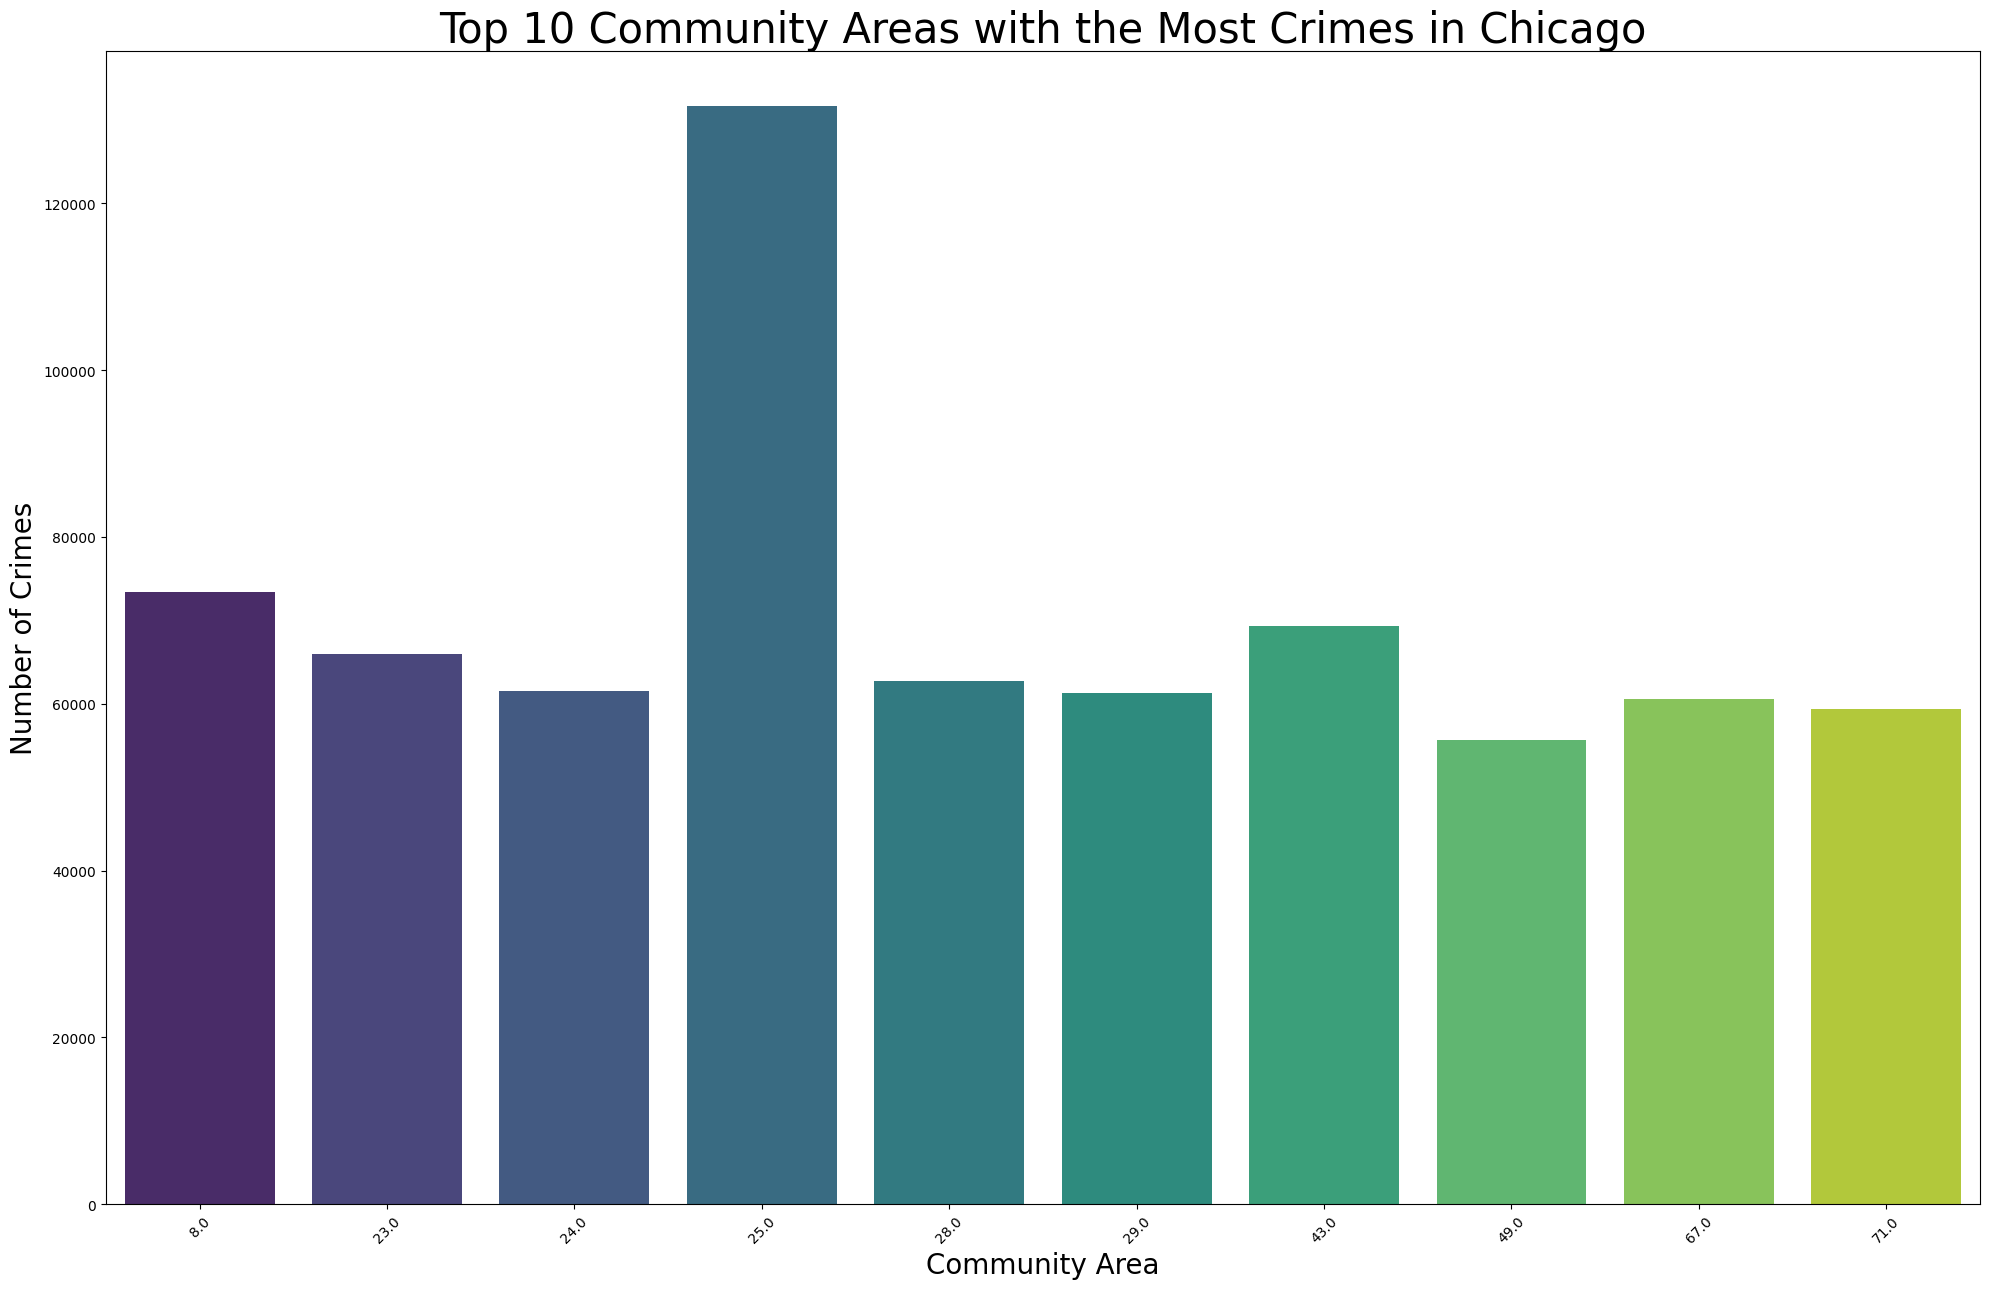

In [22]:
# Group the data by community area and count the number of crimes
community_crime_count = c_crime_df['Community Area'].value_counts().reset_index()
community_crime_count.columns = ['Community Area', 'Crime Count']

# Sort the data to find the top 10 community areas with the most crimes
top_10_community_crime = community_crime_count.head(10)

# Visualize the top 10 community areas with the most crimes
plt.figure(figsize=(20, 13))
sns.barplot(x='Community Area', y='Crime Count', data=top_10_community_crime, palette='viridis')
plt.title('Top 10 Community Areas with the Most Crimes in Chicago', fontsize = 30)
plt.xlabel('Community Area',fontsize = 20)
plt.ylabel('Number of Crimes', fontsize = 20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

15. **Top - 10 communities with the most crime in 2021**

In [ ]:
# Filter the dataset for the year 2023
chicago_crime_2021 = c_crime_df[c_crime_df['Year'] == 2021]

# Group by community and count the number of crimes
crime_by_community = chicago_crime_2021['Community Area'].value_counts().sort_values(ascending=False)

# Select the top 10 communities with the most crime
top_10_communities = crime_by_community.head(10)

# Plot the top 10 communities with the most crime
plt.figure(figsize=(20, 13))
top_10_communities.plot(kind='bar', fontsize = 15)
plt.title('Top 10 Communities with the Most Crime in 2023', fontsize = 30)
plt.xlabel('Community Area',fontsize = 20)
plt.ylabel('Number of Crimes',fontsize = 20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

16. **Top - 10 Location  where theft normally occurs**

In [ ]:
# Filter the dataset to include only theft-related incidents
theft_df = c_crime_df[chicago_crime_df['Primary Type'] == 'THEFT']

# Count the occurrences of theft incidents at each location
theft_locations_count = theft_df['Location Description'].value_counts()

# Get the top 10 locations
top_10_theft_locations = theft_locations_count.head(10)

# Plot the top 10 theft locations
plt.figure(figsize=(20, 13))
top_10_theft_locations.plot(kind='bar',fontsize = 15)
plt.title('Top 10 Locations for Theft in Chicago',fontsize = 30)
plt.xlabel('Location',fontsize = 20)
plt.ylabel('Number of Incidents', fontsize = 20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

17. **Top-15 crime where arrest occured**

In [ ]:
ax = c_crime_df[c_crime_df['Arrest'] == True].value_counts("Primary Type")[:15]\
    .plot(kind = 'barh',
          figsize = (20,13),
          fontsize = 30)
ax.set_ylabel("Type of Crime", fontsize=20)
ax.set_xlabel("Count", fontsize=20)
ax.set_title("Top 15 crimes were arrests occured", fontsize=30)
plt.show()


In [ ]:
chicago_crime_df.columns

In [ ]:
# Convert 'Date' column to datetime
chicago_crime_df['Date'] = pd.to_datetime(chicago_crime_df['Date'],format="%m/%d/%Y %I:%M:%S %p")

# Seasonal Effects
# Group by month and count number of crimes
monthly_crime_counts = chicago_crime_df.groupby(chicago_crime_df['Date'].dt.month).size()

# Plotting monthly crime trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_crime_counts.index, monthly_crime_counts.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Seasonal Crime Trend')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Changes Depending on Time of Day
# Extract hour from 'Date'
chicago_crime_df['Hour'] = chicago_crime_df['Date'].dt.hour

# Group by hour and count number of crimes
hourly_crime_counts = chicago_crime_df.groupby('Hour').size()

# Plotting hourly crime trend
plt.figure(figsize=(10, 6))
plt.plot(hourly_crime_counts.index, hourly_crime_counts.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.title('Hourly Crime Trend')
plt.xticks(range(24))
plt.grid(True)
plt.show()

**Crime rate by time of day**

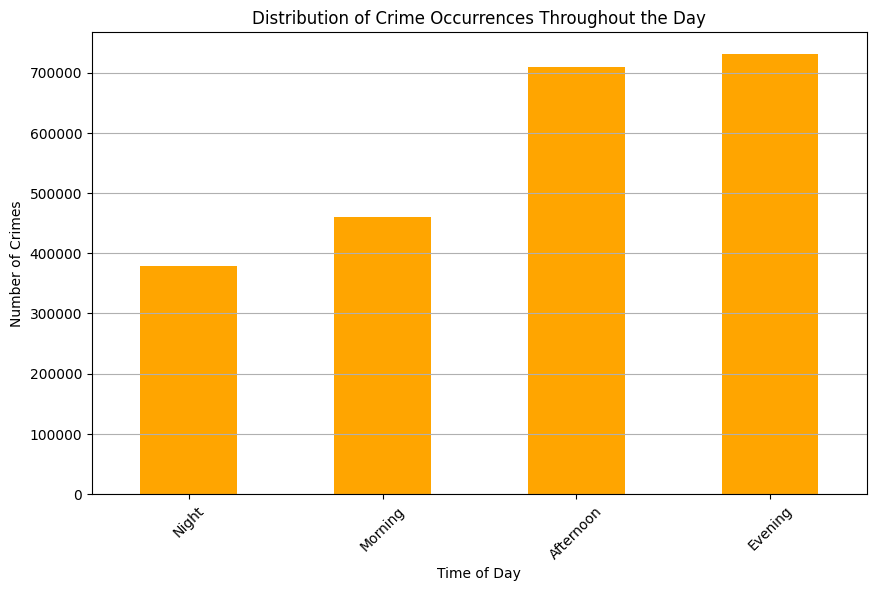

In [20]:
# Extract hour component to determine time of day
c_crime_df['Hour'] = c_crime_df['Date'].dt.hour

# Define time intervals
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

# Categorize crimes based on time of day
c_crime_df['Time_of_Day'] = pd.cut(c_crime_df['Hour'], bins=bins, labels=labels, right=False)

# Group by time of day and count the number of crimes
crime_by_time_of_day = c_crime_df['Time_of_Day'].value_counts()

# Reorder index based on time of day labels
crime_by_time_of_day = crime_by_time_of_day.reindex(labels)

# Plotting
plt.figure(figsize=(10, 6))
crime_by_time_of_day.plot(kind='bar', color='orange')
plt.title('Distribution of Crime Occurrences Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Crimes by community area**

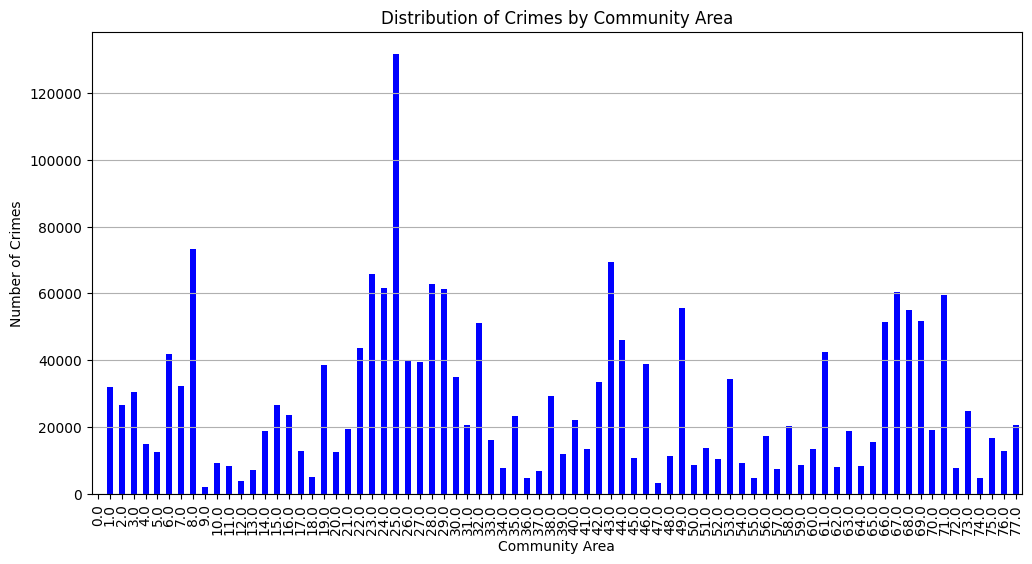

In [21]:
crime_by_community_area = c_crime_df.groupby('Community Area').size()

# Plotting
plt.figure(figsize=(12, 6))
crime_by_community_area.plot(kind='bar', color='blue')
plt.title('Distribution of Crimes by Community Area')
plt.xlabel('Community Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()